In [2]:
pip install mysql-connector-python


  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/5f/c3/b4c36fbc65c119fca83f258557573d8cd296da5e198d3752c669f8e871e2/mysql_connector_python-9.0.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/14.3 MB 1.7 MB/s eta 0:00:09
   ---------------------------------------- 0.1/14.3 MB 1.8 MB/s eta 0:00:09
   ---------------------------------------- 0.1/14.3 MB 1.4 MB/s eta 0:00:10
    --------------------------------------- 0.2/14.3 MB 1.2 MB/s eta 0:00:12
    --------------------------------------- 0.2/14.3 MB 1.2 MB/s eta 0:00:13
    --------------------------------------- 0.3/14.3 MB 1.2 MB/s eta 0:00:12
    --------------------------------------- 0.3/14.3 MB 1.1 MB/s eta 0:00:13
   - -------------------------------------- 0.4/14.3 MB 1.2 MB/s eta 0:00:12
   - -------------------------------------- 0.5/14.3 MB 1.2 MB/s eta 0:00:1

In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Devender@123',
    database='Ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'D:/Sql Projects/Ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(host = 'localhost',
                            username = 'root',
                            password = 'Devender@123',
                            database = 'ecommerce')

cur = db.cursor()



## List all unique cities where customers are located.



In [2]:
query = """ select distinct customer_city from customers"""

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

## Count the number of orders placed in 2017.

In [3]:
query = """ select count(orders.order_id) from orders where year(order_purchase_timestamp) = 2017"""

cur.execute(query)

data = cur.fetchall()

print('total orders placed in 2017 are',data[0][0])

total orders placed in 2017 are 45101


## Find the total sales per category.

In [4]:
query = """ SELECT 
    products.product_category as category, round(SUM(payments.payment_value),2) as sales
FROM
    products
        JOIN
    order_items ON products.product_id = order_items.product_id
    join payments on order_items.order_id = payments.order_id
    group by category"""

cur.execute(query)

data = cur.fetchall()

data

[('perfumery', 506738.66),
 ('Furniture Decoration', 1430176.39),
 ('telephony', 486882.05),
 ('bed table bath', 1712553.67),
 ('automotive', 852294.33),
 ('computer accessories', 1585330.45),
 ('housewares', 1094758.13),
 ('babies', 539845.66),
 ('toys', 619037.69),
 ('Furniture office', 646826.49),
 ('Cool Stuff', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('pet Shop', 311268.97),
 ('General Interest Books', 64694.76),
 ('stationary store', 317440.07),
 ('Watches present', 1429216.68),
 ('PCs', 279121.55),
 ('climatization', 91170.66),
 ('Construction Tools Construction', 241475.63),
 ('sport leisure', 1392127.56),
 ('Bags Accessories', 187151.29),
 ('electronics', 259857.1),
 ('Casa Construcao', 136645.29),
 ('Games consoles', 195480.38),
 ('Fashion Bags and Accessories', 218158.28),
 ('home appliances', 95532.27),
 ('Garden tools', 838280.75),
 ('Agro Industria e Comercio', 118730.61),
 (None, 252801.71),
 ('audio', 60324.62),
 ('technical books', 24915.44),
 ('Construction Tools 

## Calculate the percentage of orders that were paid in installments.

In [5]:
query =""" select sum(case when payment_installments >=1 then 1 else 0 end)/count(*)*100 from payments"""

cur.execute(query)

data = cur.fetchall()

print('the percentage of orders that were paid in installments is ',data[0][0])

the percentage of orders that were paid in installments is  99.9981


## Count the number of customers from each state. 

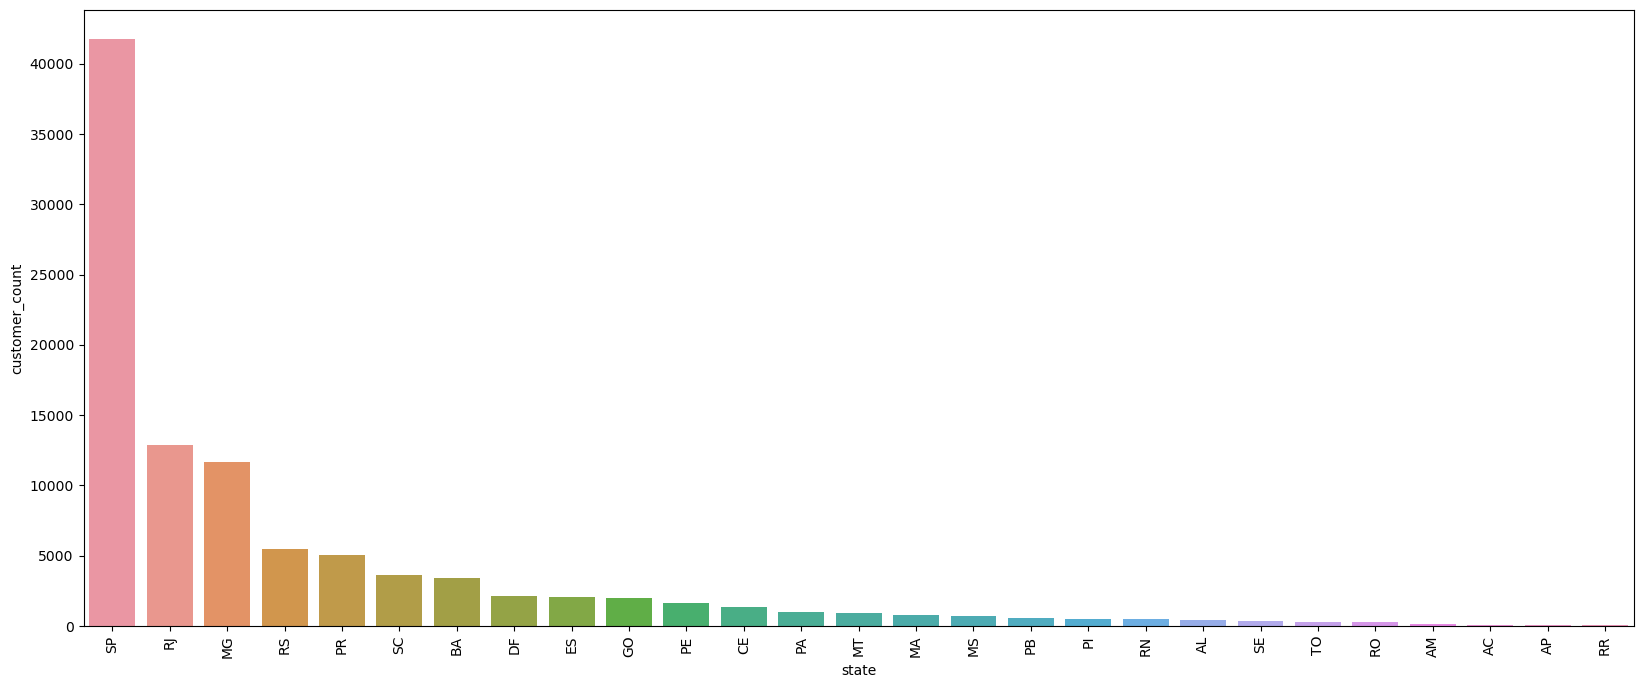

In [6]:
query =""" select customers.customer_state,count(customer_id) from customers group by 1 order by 2 desc"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=['state','customer_count'])
plt.figure(figsize=(20,8))
sns.barplot(x= 'state',y = 'customer_count',data = df)

plt.xticks(rotation = 90)
plt.show()

## Calculate the number of orders per month in 2018.

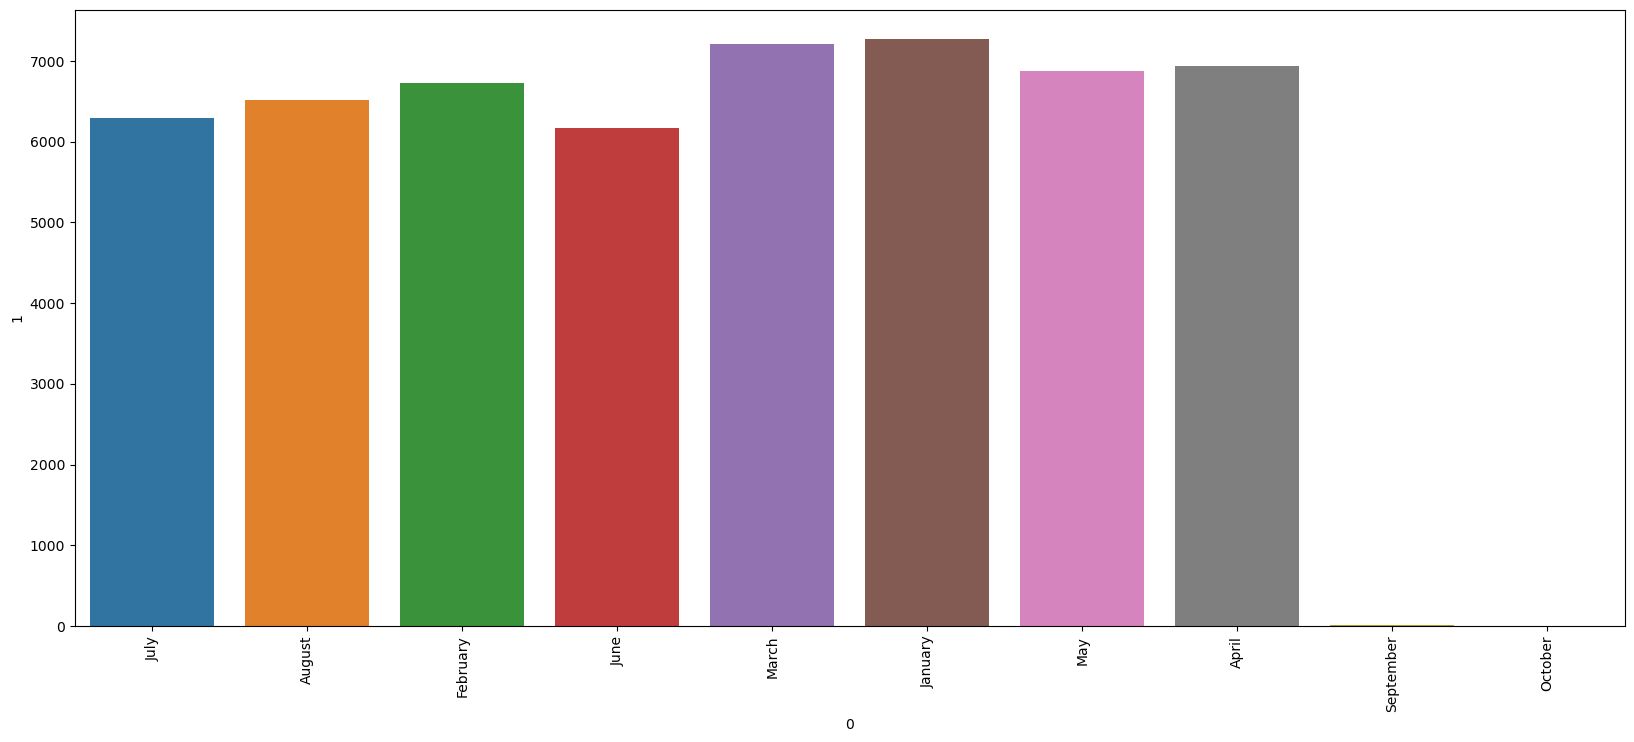

In [7]:
query ="""select monthname(order_purchase_timestamp) months , count(order_id) order_count from orders where year(order_purchase_timestamp) = 2018 group by months """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
plt.figure(figsize=(20,8))
sns.barplot(x = 0,y=1,data = df)
plt.xticks(rotation = 90)
plt.show()


## Find the average number of products per order, grouped by customer city. 


In [8]:
query ="""with count_per_order as 
(SELECT 
    orders.order_id,
    orders.customer_id,
    COUNT(order_items.order_id) as oc
FROM
    orders
        JOIN
    order_items ON orders.order_id = order_items.order_id
GROUP BY orders.order_id , orders.customer_id) 

SELECT 
    customers.customer_city, round(AVG(count_per_order.oc),2) as avg
FROM
    customers
        JOIN
    count_per_order ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city; """

cur.execute(query)

data = cur.fetchall()

data

[('sao paulo', Decimal('1.16')),
 ('sao jose dos campos', Decimal('1.14')),
 ('porto alegre', Decimal('1.17')),
 ('indaial', Decimal('1.12')),
 ('treze tilias', Decimal('1.27')),
 ('rio de janeiro', Decimal('1.15')),
 ('mario campos', Decimal('1.33')),
 ('guariba', Decimal('1.00')),
 ('cuiaba', Decimal('1.20')),
 ('franca', Decimal('1.25')),
 ('tocos', Decimal('1.00')),
 ('januaria', Decimal('1.18')),
 ('campinas', Decimal('1.16')),
 ('embu-guacu', Decimal('1.24')),
 ('cerquilho', Decimal('1.17')),
 ('belo horizonte', Decimal('1.14')),
 ('taubate', Decimal('1.13')),
 ('arcos', Decimal('1.12')),
 ('monte mor', Decimal('1.08')),
 ('vianopolis', Decimal('1.33')),
 ('cacapava', Decimal('1.16')),
 ('sao jose da tapera', Decimal('1.00')),
 ('belford roxo', Decimal('1.09')),
 ('pedro leopoldo', Decimal('1.25')),
 ('arroio do sal', Decimal('1.29')),
 ('sao bernardo do campo', Decimal('1.14')),
 ('brasilia', Decimal('1.13')),
 ('ribeirao pires', Decimal('1.12')),
 ('contagem', Decimal('1.14')),

## Calculate the percentage of total revenue contributed by each product category.

In [9]:
query ="""SELECT 
    products.product_category,
    round((SUM(payments.payment_value) / (SELECT 
            SUM(payment_value)
        FROM
            payments)) * 100,2) as sales_percentage
FROM
    products
        JOIN
    order_items ON products.product_id = order_items.product_id
        JOIN
    payments ON order_items.order_id = payments.order_id
GROUP BY 1 ORDER BY sales_percentage desc;
 """

cur.execute(query)

data = cur.fetchall()

data

[('bed table bath', 10.7),
 ('HEALTH BEAUTY', 10.35),
 ('computer accessories', 9.9),
 ('Furniture Decoration', 8.93),
 ('Watches present', 8.93),
 ('sport leisure', 8.7),
 ('housewares', 6.84),
 ('automotive', 5.32),
 ('Garden tools', 5.24),
 ('Cool Stuff', 4.87),
 ('Furniture office', 4.04),
 ('toys', 3.87),
 ('babies', 3.37),
 ('perfumery', 3.17),
 ('telephony', 3.04),
 ('stationary store', 1.98),
 ('pet Shop', 1.94),
 ('PCs', 1.74),
 ('electronics', 1.62),
 (None, 1.58),
 ('Construction Tools Construction', 1.51),
 ('musical instruments', 1.46),
 ('electrostile', 1.41),
 ('Fashion Bags and Accessories', 1.36),
 ('fixed telephony', 1.29),
 ('Games consoles', 1.22),
 ('Bags Accessories', 1.17),
 ('Casa Construcao', 0.85),
 ('Room Furniture', 0.85),
 ('ELECTRICES 2', 0.78),
 ('Agro Industria e Comercio', 0.74),
 ('home appliances', 0.6),
 ('climatization', 0.57),
 ('House comfort', 0.53),
 ('Furniture Kitchen Service Area Dinner and Garden', 0.47),
 ('Construction Tools Illumination',

## Identify the correlation between product price and the number of times a product has been purchased.

In [10]:
query ="""SELECT 
    products.product_category,
    COUNT(order_items.product_id),
    ROUND(AVG(order_items.price), 2)
FROM
    products
        JOIN
    order_items ON products.product_id = order_items.product_id
GROUP BY 1;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=['Category','order_count','price'])

arr1 = df['order_count']
arr2 = df['price']

np.corrcoef([arr1,arr2])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

## Calculate the total revenue generated by each seller, and rank them by revenue.

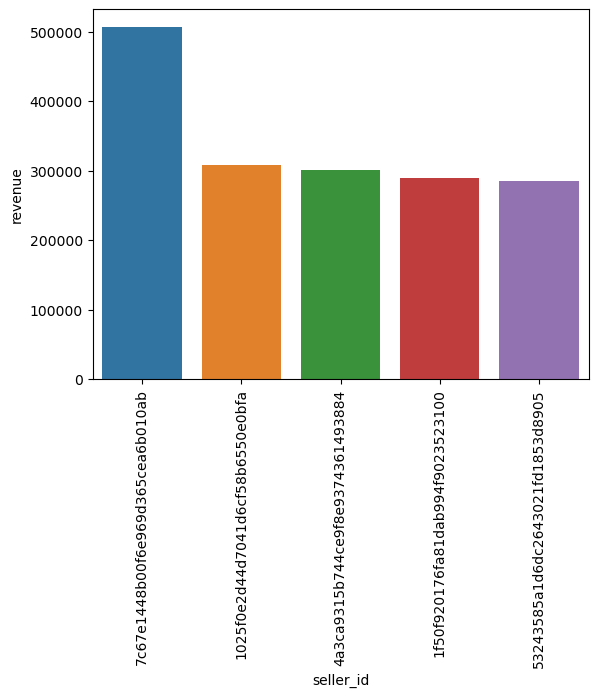

In [11]:
query ="""select *,dense_rank() over(order by revenue desc) as rn from 
(SELECT 
    order_items.seller_id, SUM(payments.payment_value) revenue
FROM
    order_items
        JOIN
    payments ON order_items.order_id = payments.order_id
GROUP BY 1) as a;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data , columns=['seller_id','revenue','rank'])

df = df.head()
sns.barplot(x = 'seller_id',y='revenue',data = df)
plt.xticks(rotation = 90)
plt.show()

## Calculate the moving average of order values for each customer over their order history. 

In [15]:
query ="""select customer_id,order_purchase_timestamp,avg(payment) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row) as mov_avg from
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment
from payments join orders on payments.order_id = orders.order_id) as a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df

,0,1,2
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.010002
...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500000


## Calculate the cumulative sales per month for each year.

In [16]:
query ="""
select years,months,payment,sum(payment) over(order by years,months) cumulative_sales from
(SELECT 
    YEAR(orders.order_purchase_timestamp) AS years,
    MONTH(orders.order_purchase_timestamp) AS months,
    round(sum(payments.payment_value),2) as payment 
FROM
    orders
    join payments on orders.order_id = payments.order_id
    group by years, months order by years,months) a;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


## Calculate the year-over-year growth rate of total sales. 

In [19]:
query ="""with a as(SELECT 
    YEAR(orders.order_purchase_timestamp) AS years,
    round(sum(payments.payment_value),2) as payment 
FROM
    orders
    join payments on orders.order_id = payments.order_id
    group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


## Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [21]:
query ="""with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id"""

cur.execute(query)

data = cur.fetchall()


data

[(None,)]

## Identify the top 3 customers who spent the most money in each year.

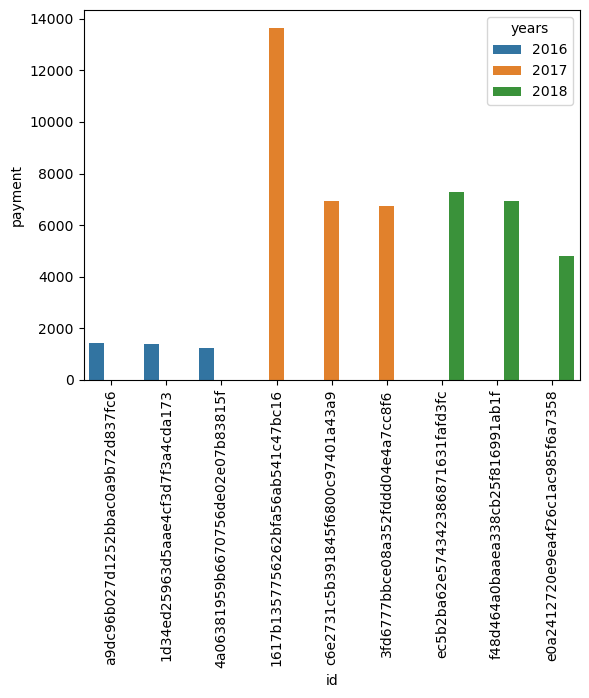

In [22]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()